<a href="https://colab.research.google.com/github/asheta66/Data-Mining-2/blob/main/SVM_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Training Performance ===
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       169
           1       0.90      0.95      0.93       286

    accuracy                           0.91       455
   macro avg       0.91      0.89      0.90       455
weighted avg       0.91      0.91      0.91       455



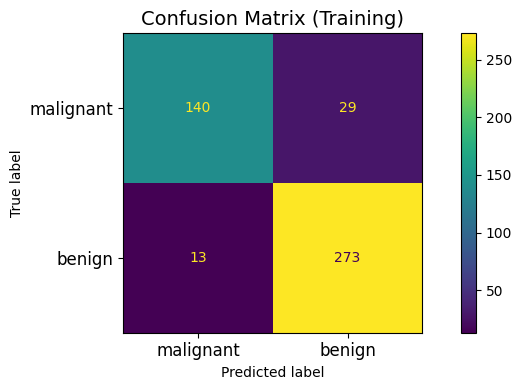

=== Testing Performance ===
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.92      0.92      0.92        71

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



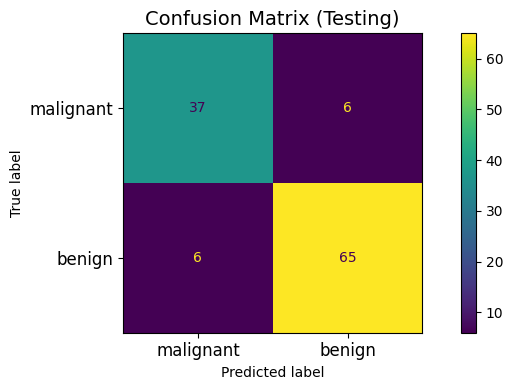


=== Performance Summary ===
          Accuracy  Precision  Recall  F1 Score
Training      0.91       0.90    0.95      0.93
Testing       0.89       0.92    0.92      0.92


<Figure size 1000x600 with 0 Axes>

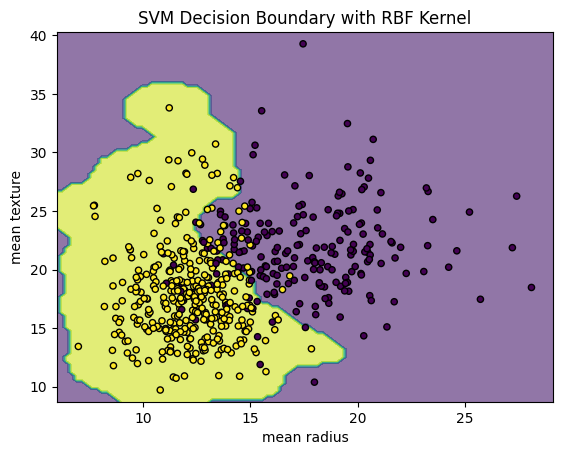

In [17]:
# Load required packages
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score
)
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data[:, :2]  # Use first two features for visualization
y = cancer.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

# Predictions
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# === Training performance ===
print("=== Training Performance ===")
print("Classification Report:\n", classification_report(y_train, y_train_pred))
cm_train = confusion_matrix(y_train, y_train_pred)

# Training confusion matrix (customized without colormap)
fig, ax = plt.subplots(figsize=(8, 4))  # Smaller size
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=cancer.target_names)
disp_train.plot(ax=ax, values_format='d')
ax.set_title("Confusion Matrix (Training)", fontsize=14)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

# === Testing performance ===
print("=== Testing Performance ===")
print("Classification Report:\n", classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)

# Testing confusion matrix (customized without colormap)
fig, ax = plt.subplots(figsize=(8, 4))  # Smaller size
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=cancer.target_names)
disp_test.plot(ax=ax, values_format='d')
ax.set_title("Confusion Matrix (Testing)", fontsize=14)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

# === Create a performance summary table ===
metrics = {
    "Accuracy": [
        accuracy_score(y_train, y_train_pred),
        accuracy_score(y_test, y_test_pred)
    ],
    "Precision": [
        precision_score(y_train, y_train_pred),
        precision_score(y_test, y_test_pred)
    ],
    "Recall": [
        recall_score(y_train, y_train_pred),
        recall_score(y_test, y_test_pred)
    ],
    "F1 Score": [
        f1_score(y_train, y_train_pred),
        f1_score(y_test, y_test_pred)
    ]
}

df_metrics = pd.DataFrame(metrics, index=["Training", "Testing"])
print("\n=== Performance Summary ===")
print(df_metrics.round(2))

# === Visualize decision boundary ===
plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="predict",
    alpha=0.6,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
plt.title("SVM Decision Boundary with RBF Kernel")
plt.show()
